In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from factor_analyzer import calculate_kmo

# Open file

In [161]:
df = pd.read_excel('SleepStudy.xlsx')

In [162]:
df.columns

Index(['Gender', 'ClassYear', 'NumEarlyClass', 'EarlyClass',
       'PoorSleepQuality', 'DepressionScore', 'AnxietyScore', 'StressScore',
       'DepressionStatus', 'AnxietyStatus', 'Stress', 'AlcoholUse', 'Drinks',
       'AverageSleep'],
      dtype='object')

# Codificación

In [6]:
df['Gender'] = df['Gender'].replace({1:"Masculino", 0: "Femenino"})
df['EarlyClass'] = df['EarlyClass'].replace({1:"Sí", 0: "No"})

## Función para enteros

In [7]:
def crear_intervalos_sturges(df, columnas, etiquetas=False):
    """
    Crea intervalos usando la regla de Sturges para columnas específicas de un DataFrame.

    Parámetros:
    - df: DataFrame de pandas.
    - columnas: Lista de nombres de columnas (ej: ['col1', 'col2']).
    - etiquetas: Si es True, genera una columna adicional con etiquetas descriptivas.

    Retorna:
    - DataFrame con las nuevas columnas de intervalos.
    - Diccionario con los límites (bins) de cada columna.
    """

    bins_por_columna = {}

    for col in columnas:
        # Verificar que la columna exista
        if col not in df.columns:
            raise ValueError(f"La columna '{col}' no existe en el DataFrame")

        # Calcular parámetros estadísticos
        datos = df[col].dropna()
        n = len(datos)
        min_val = datos.min()
        max_val = datos.max()
        rango = max_val - min_val

        # Regla de Sturges
        k = 1 + math.log2(n) if n > 0 else 1
        k = math.ceil(k)

        # Evitar división por cero si rango = 0 (todos los valores iguales)
        if rango == 0:
            bins = [min_val, min_val + 1e-9]  # Intervalo infinitesimal
        else:
            bins = np.linspace(min_val, max_val, num=k + 1)

        # Guardar bins para referencia
        bins_por_columna[col] = bins

        # Crear columnas de intervalos
        nombre_inter = f'{col}_intervalo'
        df[nombre_inter] = pd.cut(
            df[col],
            bins=bins,
            right=True,
            include_lowest=True,
            labels=False
        )

        # Crear etiquetas descriptivas si se solicita
        if etiquetas:
            etiquetas_col = [f'({bins[i]:.0f}-{bins[i+1]:.0f}]' for i in range(len(bins)-1)]
            nombre_etiqueta = f'{col}_intervalo_etiqueta'
            df[nombre_etiqueta] = pd.cut(
                df[col],
                bins=bins,
                right=True,
                include_lowest=True,
                labels=etiquetas_col
            )

    return df, bins_por_columna

## Función decimales

In [8]:
def crear_intervalos_sturges_2(df, columnas, etiquetas=False):
    """
    Crea intervalos usando la regla de Sturges para columnas específicas de un DataFrame.

    Parámetros:
    - df: DataFrame de pandas.
    - columnas: Lista de nombres de columnas (ej: ['col1', 'col2']).
    - etiquetas: Si es True, genera una columna adicional con etiquetas descriptivas.

    Retorna:
    - DataFrame con las nuevas columnas de intervalos.
    - Diccionario con los límites (bins) de cada columna.
    """

    bins_por_columna = {}

    for col in columnas:
        # Verificar que la columna exista
        if col not in df.columns:
            raise ValueError(f"La columna '{col}' no existe en el DataFrame")

        # Calcular parámetros estadísticos
        datos = df[col].dropna()
        n = len(datos)
        min_val = datos.min()
        max_val = datos.max()
        rango = max_val - min_val

        # Regla de Sturges
        k = 1 + math.log2(n) if n > 0 else 1
        k = math.ceil(k)

        # Evitar división por cero si rango = 0 (todos los valores iguales)
        if rango == 0:
            bins = [min_val, min_val + 1e-9]  # Intervalo infinitesimal
        else:
            bins = np.linspace(min_val, max_val, num=k + 1)

        # Guardar bins para referencia
        bins_por_columna[col] = bins

        # Crear columnas de intervalos
        nombre_inter = f'{col}_intervalo'
        df[nombre_inter] = pd.cut(
            df[col],
            bins=bins,
            right=True,
            include_lowest=True,
            labels=False
        )

        # Crear etiquetas descriptivas si se solicita
        if etiquetas:
            etiquetas_col = [f'({bins[i]:.2f}-{bins[i+1]:.2f}]' for i in range(len(bins)-1)]
            nombre_etiqueta = f'{col}_intervalo_etiqueta'
            df[nombre_etiqueta] = pd.cut(
                df[col],
                bins=bins,
                right=True,
                include_lowest=True,
                labels=etiquetas_col
            )

    return df, bins_por_columna


## Uso de las funciones

In [9]:
df_update, bins = crear_intervalos_sturges(df, columnas= ['PoorSleepQuality', 'DepressionScore', 'AnxietyScore', 'StressScore','Drinks', ], etiquetas= True)

In [10]:
df_update, bins = crear_intervalos_sturges_2(df, columnas= ['AverageSleep', ], etiquetas= True)

In [11]:
df_update.columns

Index(['Gender', 'ClassYear', 'NumEarlyClass', 'EarlyClass',
       'PoorSleepQuality', 'DepressionScore', 'AnxietyScore', 'StressScore',
       'DepressionStatus', 'AnxietyStatus', 'Stress', 'AlcoholUse', 'Drinks',
       'AverageSleep', 'PoorSleepQuality_intervalo',
       'PoorSleepQuality_intervalo_etiqueta', 'DepressionScore_intervalo',
       'DepressionScore_intervalo_etiqueta', 'AnxietyScore_intervalo',
       'AnxietyScore_intervalo_etiqueta', 'StressScore_intervalo',
       'StressScore_intervalo_etiqueta', 'Drinks_intervalo',
       'Drinks_intervalo_etiqueta', 'AverageSleep_intervalo',
       'AverageSleep_intervalo_etiqueta'],
      dtype='object')

# Guardar como un libro de Excel

In [12]:
df_update.to_excel("SleepStudyDESC.xlsx", index = True)

# Detección de valores atípicos multivariados

In [174]:
import numpy as np
import pandas as pd
from scipy.stats import chi2
import matplotlib.pyplot as plt


In [175]:
# Ejemplo: Supón que ya tienes tu DataFrame con las variables indicadas
# df = pd.read_csv("tus_datos.csv")

# Asegúrate de seleccionar únicamente las variables de interés:
variables = ['NumEarlyClass', 'PoorSleepQuality', 'DepressionScore', 
             'AnxietyScore', 'StressScore', 'Drinks', 'AverageSleep']
data = df[variables].copy()


In [176]:
mean_vector = data.mean().values
cov_matrix = np.cov(data.T)

In [177]:
inv_cov_matrix = np.linalg.inv(cov_matrix)

In [169]:
def mahalanobis_distance(row, mean, inv_cov):
    diff = row - mean
    return np.sqrt(diff.T @ inv_cov @ diff)

# Aplicar la función a cada fila
df_num['mahal_dist'] = df_num.apply(lambda row: mahalanobis_distance(row[['NumEarlyClass', 'PoorSleepQuality', 
             'DepressionScore', 'AnxietyScore', 'StressScore', 
             'Drinks', 'AverageSleep']].values, mean_vector, inv_cov_matrix), axis=1)

C:\Users\Home\AppData\Local\Temp\ipykernel_5652\2511830824.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['mahal_dist'] = df_num.apply(lambda row: mahalanobis_distance(row[['NumEarlyClass', 'PoorSleepQuality',


In [170]:
# Nivel de significancia (alpha)
alpha = 0.01
# Grados de libertad = número de variables
dof = 2
# Umbral: valor crítico de chi-cuadrado para dof grados de libertad
threshold = np.sqrt(chi2.ppf(1 - alpha, dof))
print("Umbral (distancia):", threshold)

Umbral (distancia): 3.0348542587702925


In [172]:
df_num['Outlier'] = df_num['mahal_dist'] > threshold

C:\Users\Home\AppData\Local\Temp\ipykernel_5652\318918925.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['Outlier'] = df_num['mahal_dist'] > threshold


In [173]:
plt.figure(figsize=(8,6))
plt.scatter(df_num['X'], df_num['Y'], c='blue', label='Datos normales')
plt.scatter(df_num.loc[df_num['Outlier'], 'X'], df_num.loc[df_num['Outlier'], 'Y'], c='red', label='Outliers')

plt.xlabel("Variable X")
plt.ylabel("Variable Y")
plt.title("Detección de valores atípicos usando la distancia de Mahalanobis")
plt.legend()
plt.show()

KeyError: 'X'

<Figure size 800x600 with 0 Axes>

 # PCA

In [144]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [154]:
pca_df = df[['NumEarlyClass', 'PoorSleepQuality', 
             'DepressionScore', 'AnxietyScore', 'StressScore', 
             'Drinks', 'AverageSleep']]


In [155]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(pca_df)

In [156]:
# Paso 1: Eliminar datos faltantes (si los hay)
df_scaled = pca_df.dropna()

# Paso 2: Calcular el índice KMO
kmo_all, kmo_model = calculate_kmo(df_scaled)

# Resultados
print(f"KMO general (todas las variables): {kmo_model:.3f}")
print("\nKMO por variable:")
for i, col in enumerate(df_scaled.columns):
    print(f"{col}: {kmo_all[i]:.3f}")

KMO general (todas las variables): 0.666

KMO por variable:
NumEarlyClass: 0.383
PoorSleepQuality: 0.695
DepressionScore: 0.719
AnxietyScore: 0.696
StressScore: 0.640
Drinks: 0.448
AverageSleep: 0.486


In [157]:
# Calcular la matriz de correlación de Pearson
correlation_matrix = pca_df.corr(method='pearson')


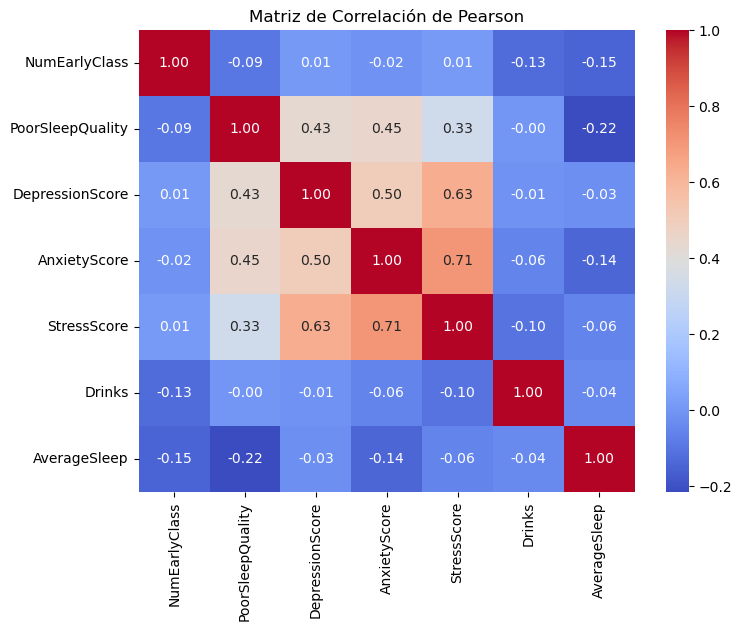

In [158]:
# Crear un mapa de calor con seaborn
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación de Pearson")
plt.show()

KeyError: 'Gender'

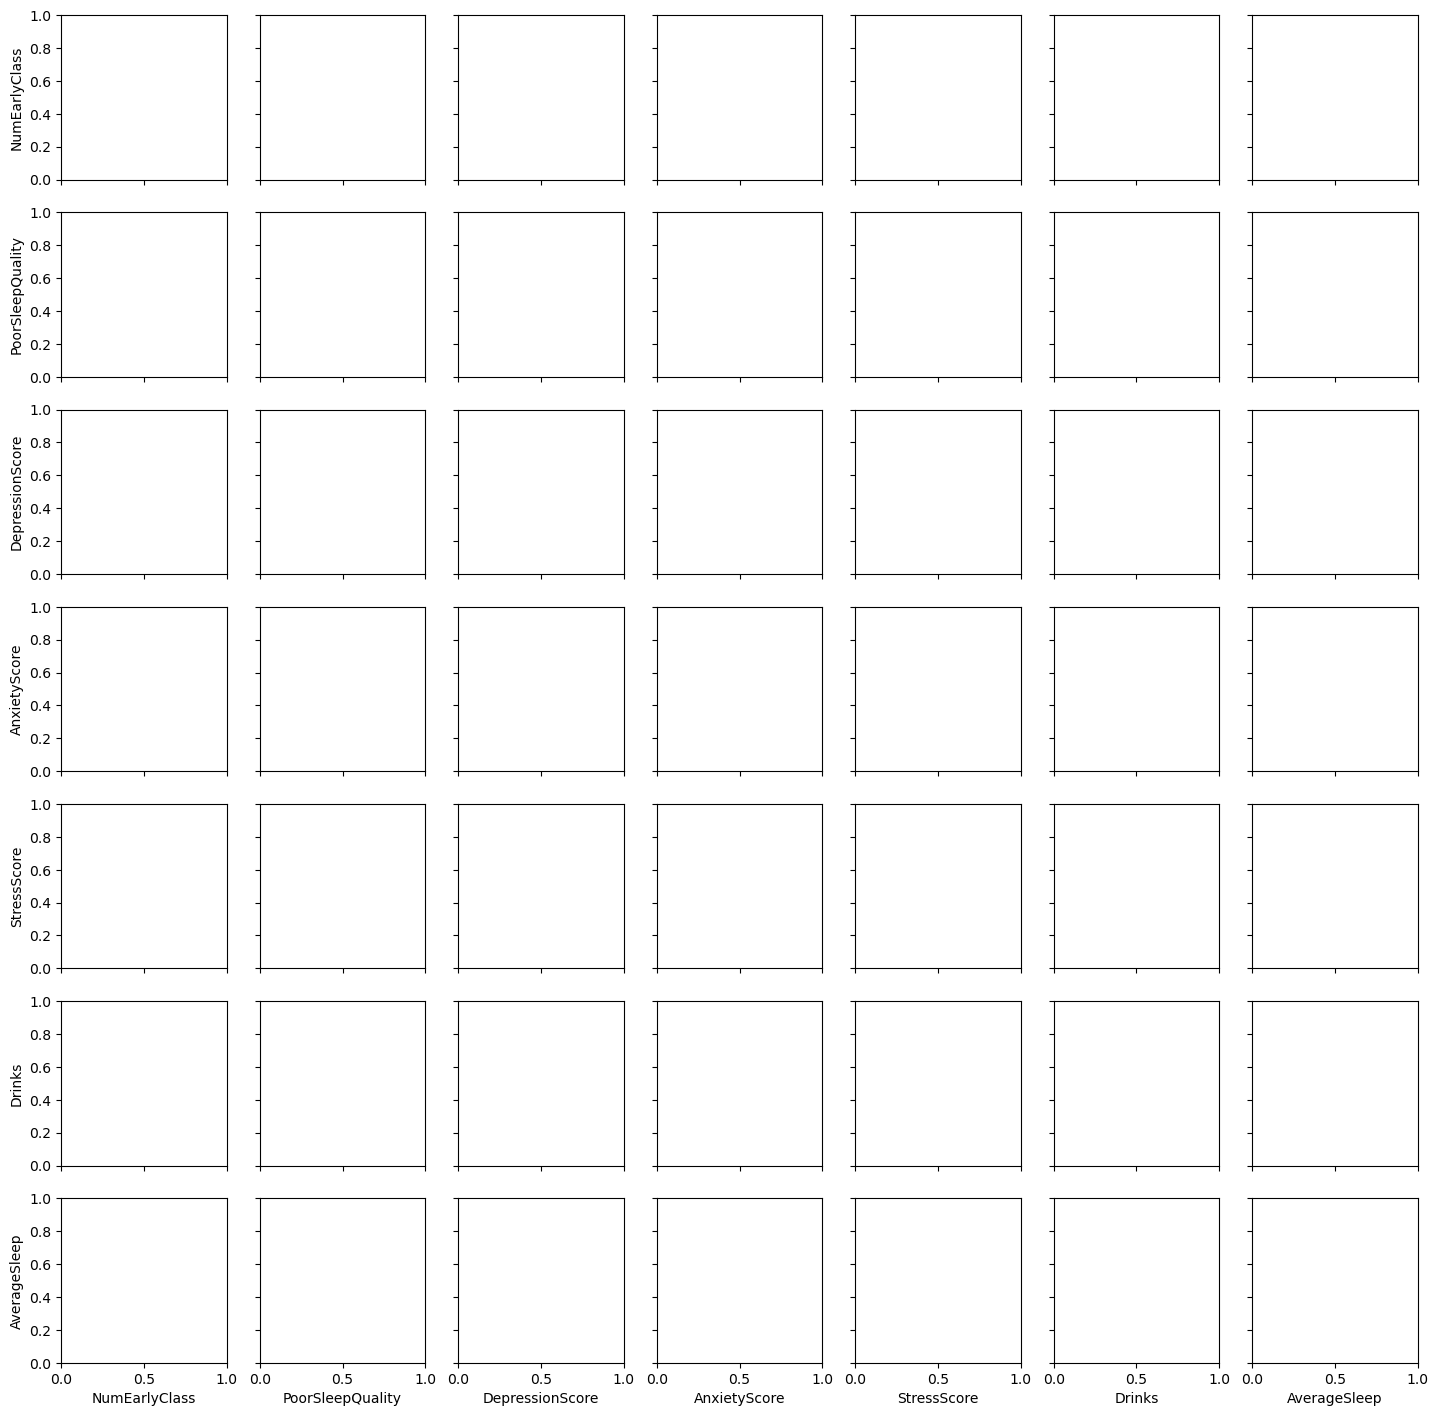

In [159]:
# Crear el gráfico de pares
sns.pairplot(pca_df, hue="Gender", diag_kind="kde")

# Mostrar el gráfico
plt.show()

# Machine Learning

In [40]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix
from lightgbm import LGBMClassifier
import optuna

In [124]:
# df_machine, bins = crear_intervalos_sturges(df, columnas= ['PoorSleepQuality'], etiquetas= False)

# Paso 1: Calcular la media de la variable
media = df['PoorSleepQuality'].mean()

# Paso 2: Crear nueva columna con 1 (arriba de la media) y 0 (abajo)
df_machine['PoorSleepQuality_media'] = df['PoorSleepQuality'].apply(lambda x: 0 if x > media else 1)

In [137]:
df_machine["PoorSleepQuality_media"].dtype

dtype('int64')

In [125]:
df_machine = pd.DataFrame(df_machine)

In [126]:
df_encoded = pd.get_dummies(df_machine, columns=['Gender', 'ClassYear', 'EarlyClass', 'DepressionStatus', 'AnxietyStatus', 'Stress', 'AlcoholUse'], drop_first=False)

In [127]:
df_encoded.columns

Index(['NumEarlyClass', 'PoorSleepQuality', 'DepressionScore', 'AnxietyScore',
       'StressScore', 'Drinks', 'AverageSleep', 'PoorSleepQuality_intervalo',
       'PoorSleepQuality_media', 'Gender_0', 'Gender_1', 'ClassYear_1',
       'ClassYear_2', 'ClassYear_3', 'ClassYear_4', 'EarlyClass_0',
       'EarlyClass_1', 'DepressionStatus_moderate', 'DepressionStatus_normal',
       'DepressionStatus_severe', 'AnxietyStatus_moderate',
       'AnxietyStatus_normal', 'AnxietyStatus_severe', 'Stress_high',
       'Stress_normal', 'AlcoholUse_Abstain', 'AlcoholUse_Heavy',
       'AlcoholUse_Light', 'AlcoholUse_Moderate'],
      dtype='object')

In [129]:
vars = ['NumEarlyClass', 'DepressionScore', 'AnxietyScore', 'StressScore',
       'Drinks', 'AverageSleep', 'Gender_0', 'Gender_1', 'ClassYear_1',
       'ClassYear_2', 'ClassYear_3', 'ClassYear_4', 'EarlyClass_0',
       'EarlyClass_1', 'DepressionStatus_moderate', 'DepressionStatus_normal',
       'DepressionStatus_severe', 'AnxietyStatus_moderate',
       'AnxietyStatus_normal', 'AnxietyStatus_severe', 'Stress_high',
       'Stress_normal', 'AlcoholUse_Abstain', 'AlcoholUse_Heavy',
       'AlcoholUse_Light', 'AlcoholUse_Moderate']

In [130]:
y = df_encoded['PoorSleepQuality_media']
X = df_encoded.loc[:,(df_encoded.columns.isin(vars))]

In [131]:
# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [132]:
def calcular_costo_personalizado(y_true, y_pred,base):

    cm = confusion_matrix(y_true, y_pred)
    
    precisions = []
    recalls = []
    
    for i in range(len(cm)):
        # TP: Verdaderos positivos para la clase 'i' (diagonal de la matriz)
        TP = cm[i, i]
        
        # FP: Falsos positivos para la clase 'i' (sumar la columna sin el elemento TP)
        FP = np.sum(cm[:, i]) - TP
        
        # FN: Falsos negativos para la clase 'i' (sumar la fila sin el elemento TP)
        FN = np.sum(cm[i, :]) - TP
        
        # Calcular precisión para la clase
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        precisions.append(precision)
        
        # Calcular recall para la clase
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0
        recalls.append(recall)
    
    pesos_precision = [1, 0,0 ,0]  # Priorizando evitar falsos positivos
    pesos_recall = [0, 0.15, 0.25, 0.60]     # Priorizando tener verdaderos positivos
    
    # Calcular la función de costo
    costo_precision = sum([precisions[i] * pesos_precision[i] for i in range(len(precisions))])
    costo_recall = sum([recalls[i] * pesos_recall[i] for i in range(len(recalls))])
    print(f'{base=}\n{costo_precision=}\n{costo_recall=}')
    # Costo total combinado
    costo_total = costo_precision + costo_recall
    
    return costo_total

def funcion_costo(x_train,y_train,x_test,y_test,model):
    train_cost = calcular_costo_personalizado(y_train,model.predict(x_train),'train') 
    test_cost = calcular_costo_personalizado(y_test,model.predict(x_test),'test') 
    
    cost = train_cost+test_cost

    cost = cost 
    
    return cost


In [133]:
class WeakModel():
    def __init__(self, x_train: pd.DataFrame, y_train: pd.Series,x_test: pd.DataFrame, y_test: pd.Series, features: list, n_trials: int,funcion_costo) -> None:
        self.features = features
        self.n_trials = n_trials
        self.loss_func = funcion_costo
        self.x_train = x_train.loc[:,features]
        self.y_train = y_train
        self.x_test = x_test.loc[:,features]
        self.y_test = y_test

    def __objective(self, trial):
        boosting_type = trial.suggest_categorical('boosting_type', ['gbdt', 'dart', 'rf'])
        n_estimators = trial.suggest_int('n_estimators', 100, 1000)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
        num_leaves = trial.suggest_int('num_leaves', 31, 200)
        max_depth = trial.suggest_int('max_depth', 2, 100)
        min_child_weight = trial.suggest_float('min_child_weight', 0, 0.1)
        min_child_samples = trial.suggest_int('min_child_samples', 0, 100)
        feature_fraction = trial.suggest_float('feature_fraction', 0.1, 0.9)
        random_state = trial.suggest_int('random_state', 0, 4294967295)
        reg_alpha = trial.suggest_float('reg_alpha', 0.0, 1.0)
        reg_lambda = trial.suggest_float('reg_lambda', 0.0, 1.0)
        scale_pos_weight = trial.suggest_float('scale_pos_weight', 1.0, 50.0)
        max_bin = trial.suggest_int('max_bin', 100, 500)
        min_split_gain = trial.suggest_float('min_split_gain', 0.0, 1.0)
        
        if boosting_type == 'rf':
            bagging_fraction = trial.suggest_float('bagging_fraction', 0.1, 0.9)
            bagging_freq = trial.suggest_int('bagging_freq', 1, 2)
            subsample = 1.0
            subsample_freq = 0
        else:
            subsample = trial.suggest_float('subsample', 0.1, 0.9)
            subsample_freq = trial.suggest_int('subsample_freq', 1, 10)
            bagging_fraction = None
            bagging_freq = None

        colsample_bytree = trial.suggest_float('colsample_bytree', 0.1, 0.9)

        model = LGBMClassifier(
            boosting_type=boosting_type,
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            num_leaves=num_leaves,
            max_depth=max_depth,
            min_child_weight=min_child_weight,
            min_child_samples=min_child_samples,
            feature_fraction=feature_fraction,
            random_state=random_state,
            reg_alpha=reg_alpha,
            reg_lambda=reg_lambda,
            scale_pos_weight=scale_pos_weight,
            max_bin=max_bin,
            min_split_gain=min_split_gain,
            objective='multiclass',
            verbose=-1,
            subsample=subsample,
            subsample_freq=subsample_freq,
            colsample_bytree=colsample_bytree,
            bagging_fraction=bagging_fraction,
            bagging_freq=bagging_freq
        )
        
        model.fit(self.x_train,self.y_train)
        score = funcion_costo(self.x_train,self.y_train,self.x_test,self.y_test,model)


        return score
    
    def train(self):
        
        study = optuna.create_study(direction="maximize")
        study.optimize(self.__objective, n_trials=self.n_trials, show_progress_bar=True,timeout=None)

        model = LGBMClassifier(**study.best_params)
        model.fit( self.x_train, self.y_train)
        
        return model
    
    def get_feature_importances(self) -> pd.DataFrame:
        regressor = self.train()

        importances = regressor.feature_importances_

        df_importances = pd.DataFrame(zip(self.features, importances), columns=['feature', 'importance']).sort_values(by='importance', ascending=False)
        df_importances['cumsum_importance'] = df_importances['importance'].cumsum()
        df_importances['pct_cumsum_importance'] = df_importances['cumsum_importance'] / df_importances['importance'].sum()

        return df_importances

In [134]:
model_class = WeakModel(x_train= X_train, y_train= y_train,x_test=X_test, y_test=y_test, features= vars, n_trials=200,funcion_costo=funcion_costo)

In [135]:
model = model_class.train()

[I 2025-04-01 22:34:13,777] A new study created in memory with name: no-name-76650cbf-687e-4bd9-b013-4de650228df2


  0%|          | 0/200 [00:00<?, ?it/s]

[W 2025-04-01 22:34:13,805] Trial 0 failed with parameters: {'boosting_type': 'gbdt', 'n_estimators': 487, 'learning_rate': 0.058888989579220154, 'num_leaves': 82, 'max_depth': 58, 'min_child_weight': 0.025205397900950888, 'min_child_samples': 18, 'feature_fraction': 0.6987906341793144, 'random_state': 1748911701, 'reg_alpha': 0.5988548230952228, 'reg_lambda': 0.3268766836553124, 'scale_pos_weight': 27.378697602708602, 'max_bin': 410, 'min_split_gain': 0.8507219362200665, 'subsample': 0.7306191711588625, 'subsample_freq': 5, 'colsample_bytree': 0.378670326438471} because of the following error: LightGBMError('Number of classes should be specified and greater than 1 for multiclass training').
Traceback (most recent call last):
  File "c:\Users\Home\anaconda3\Lib\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\Home\AppData\Local\Temp\ipykernel_5652\1667627365.py", line 64, in __objectiv

LightGBMError: Number of classes should be specified and greater than 1 for multiclass training

In [22]:
df.columns

Index(['Gender', 'ClassYear', 'NumEarlyClass', 'EarlyClass',
       'PoorSleepQuality', 'DepressionScore', 'AnxietyScore', 'StressScore',
       'DepressionStatus', 'AnxietyStatus', 'Stress', 'AlcoholUse', 'Drinks',
       'AverageSleep'],
      dtype='object')